In [8]:
from standardInclude import *
import random

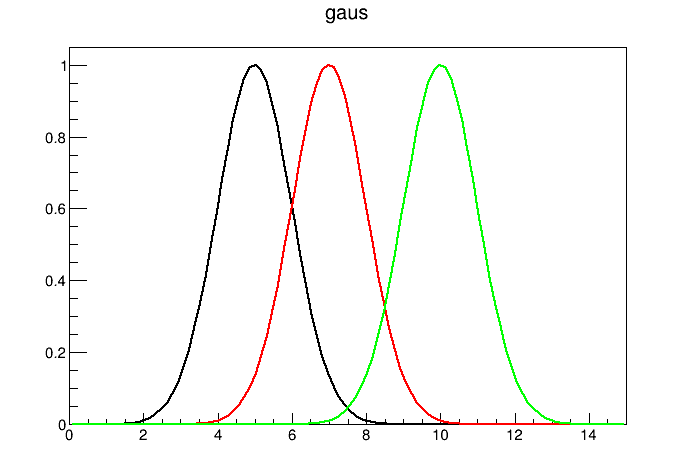

In [33]:
c = r.TCanvas()
f1 = r.TF1("f1","gaus",0,15)
f1.SetParameters(1,5,1)
f1.SetLineColor(1)
f2 = r.TF1("f2","gaus",0,15)
f2.SetParameters(1,7,1)
f2.SetLineColor(2)
f3 = r.TF1("f2","gaus",0,15)
f3.SetParameters(1,10,1)
f3.SetLineColor(3)

f1.Draw()
f2.Draw("SAME")
f3.Draw("SAME")
c.Draw()

funcs = [f1,f2,f3]

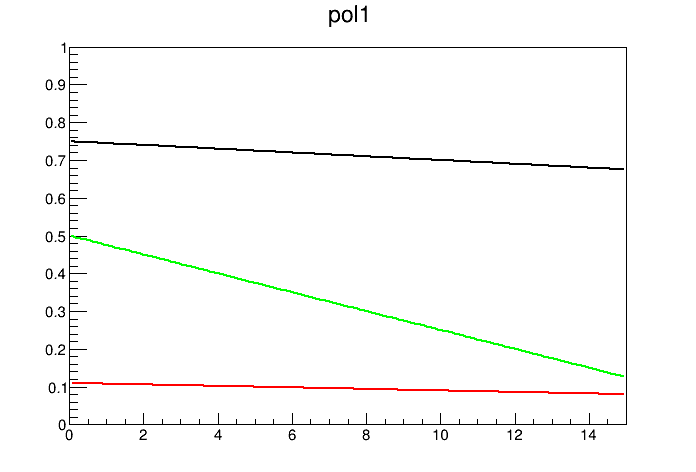

In [67]:
c = r.TCanvas()
l1 = r.TF1("f1","pol1",0,15)
l1.SetParameters(.750,-.005,1)
l1.SetLineColor(1)
l2 = r.TF1("f2","pol1",0,15)
l2.SetParameters(.110,-.002,1)
l2.SetLineColor(2)
l3 = r.TF1("f2","pol1",0,15)
l3.SetParameters(.5,-0.025,1)
l3.SetLineColor(3)

l1.GetYaxis().SetRangeUser(0,1)

l1.Draw()
l2.Draw("SAME")
l3.Draw("SAME")
c.Draw()

lossProbs = [l1,l2,l3]

In [71]:
h = r.TH2D("h","x vs. t of losses; x; t",150,0,15,150,0,15)
np.random.seed(1234)
verbosity = 0
nMuons = 100000
for i in range(nMuons):
    #generate a random x,t pair
    x = np.random.uniform(0,15)
    t = np.random.uniform(0,15)
    #get the probability of being in each FR distribution from the functions in funcs
    absoluteProbs = []
    for f in funcs:
        absoluteProbs.append( f.Eval(x) )
    #normalize the probablitites at this point, and choose one
    normProbs = [float(i)/sum(absoluteProbs) for i in absoluteProbs]
    choice = np.random.choice(len(normProbs),1,p=normProbs)[0]

    #get the probability of being lost from this distribution at this time
    pLoss = lossProbs[choice].Eval(t)
    overUnder = np.random.random()
    if(verbosity > 0):
        print('******************************')
        print(x)
        print(normProbs)
        print(choice)
        print(pLoss, overUnder)

    if(pLoss > overUnder):
        h.Fill(x,t)

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


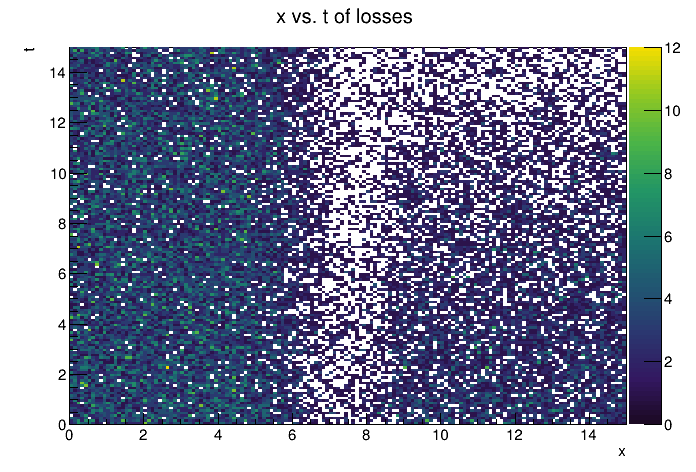

In [72]:
c = r.TCanvas()
h.Draw("colz")
c.Draw()

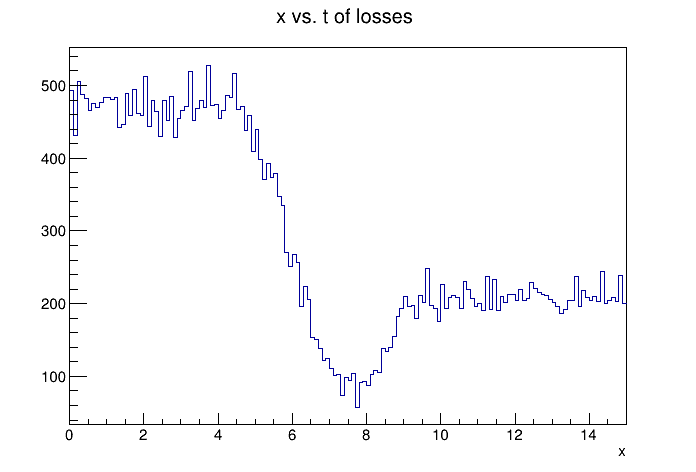

In [73]:
c = r.TCanvas()
h.ProjectionX().Draw("colz")
c.Draw()

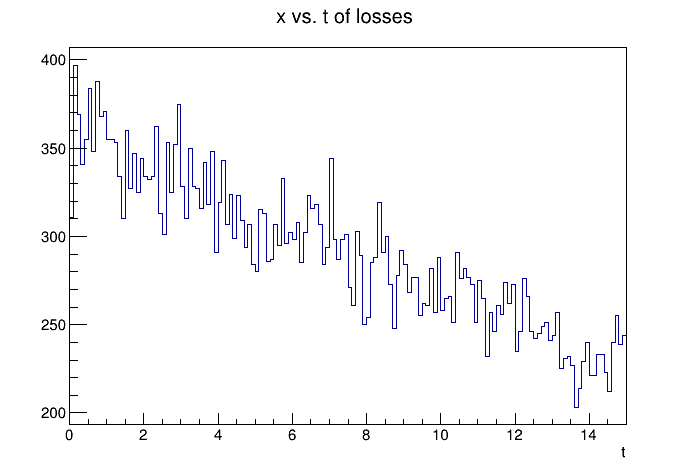

In [74]:
c = r.TCanvas()
h.ProjectionY().Draw("colz")
c.Draw()